# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [19]:
# Load pickled data
#Loading modules
import pickle
import sys
import os
import numpy as np
import csv
import pandas as pd
import random
import matplotlib.pyplot as plt

In [20]:
sys.path  #check the traffic-signs-data is included in the path file

['C:\\Udacity\\Computer Vision Fundamental\\1_lane_finding_resubmit\\home\\CarND-LaneLines-P1',
 'C:\\Udacity\\Computer Vision Fundamental_Advanced_lane_finding\\Project_Advanced_lane_finding\\udacity_workspace',
 'C:\\Python\\traffic-signs-data',
 'C:\\Python\\Anaconda3_2020_07_64bit\\envs\\tensorflow\\python36.zip',
 'C:\\Python\\Anaconda3_2020_07_64bit\\envs\\tensorflow\\DLLs',
 'C:\\Python\\Anaconda3_2020_07_64bit\\envs\\tensorflow\\lib',
 'C:\\Python\\Anaconda3_2020_07_64bit\\envs\\tensorflow',
 '',
 'C:\\Python\\Anaconda3_2020_07_64bit\\envs\\tensorflow\\lib\\site-packages',
 'C:\\Python\\Anaconda3_2020_07_64bit\\envs\\tensorflow\\lib\\site-packages\\win32',
 'C:\\Python\\Anaconda3_2020_07_64bit\\envs\\tensorflow\\lib\\site-packages\\win32\\lib',
 'C:\\Python\\Anaconda3_2020_07_64bit\\envs\\tensorflow\\lib\\site-packages\\Pythonwin',
 'C:\\Python\\Anaconda3_2020_07_64bit\\envs\\tensorflow\\lib\\site-packages\\IPython\\extensions',
 'C:\\Users\\lim Lenova 2015\\.ipython']

In [21]:
print(os.getcwd()) #confirm the current path

C:\Python\traffic-signs-data


In [22]:
#Reading the raw data

training_file = './train.p'
validation_file='./valid.p'
testing_file = './test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
x_train, y_train = train['features'], train['labels']
x_valid, y_valid = valid['features'], valid['labels']
x_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [23]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = x_train.shape[0]

# TODO: Number of validation examples
n_validation = x_valid.shape[0]

# TODO: Number of testing examples.
n_test = x_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = x_train.shape[1:]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Number of Validation examples =", n_validation)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)



Number of training examples = 34799
Number of testing examples = 12630
Number of Validation examples = 4410
Image data shape = (32, 32, 3)
Number of classes = 43


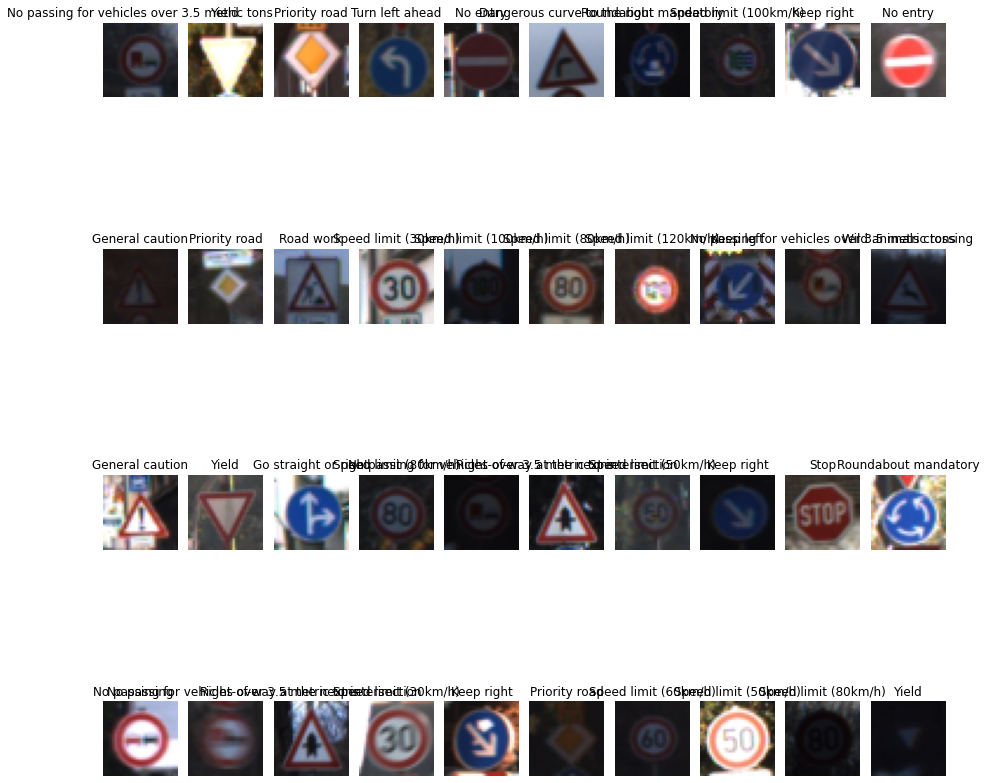

In [24]:
def plot_images(images, rows, cols, labels=None):
    fig, axs = plt.subplots(ncols=cols, nrows=rows, figsize=(12, 14))
    axs = axs.ravel()
    for index, title in zip(range(len(images)), images):
        axs[index].imshow(images[title], plt.gray())
        if(labels != None):
           axs[index].set_title(labels[index])
        else:
            axs[index].set_title(title)
            
        axs[index].set_axis_off()
        
    plt.tight_layout()
    
csv_values = np.genfromtxt('signnames.csv', skip_header=1, dtype=[('myint','i8'), ('mysring','S55')], delimiter=',')
    
number_of_images = 40 #figure에 4x10 
figures = {} 
labels = {} 



for i in range(number_of_images):
    index = random.randint(0, n_train-1)
    labels[i] = csv_values[y_train[index]][1].decode('ascii')
#     print(name_values[y_train[index]][1].decode('ascii'))
    figures[i] = x_train[index]
  


#(figures,labels) = processing(number_of_images)

plot_images(figures, 4, 10, labels)




### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

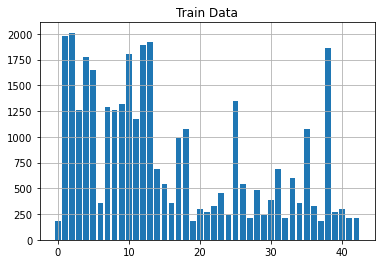

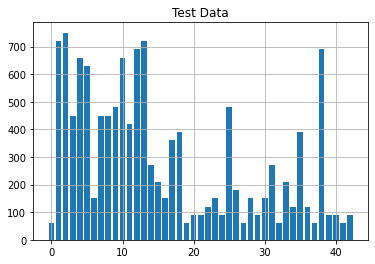

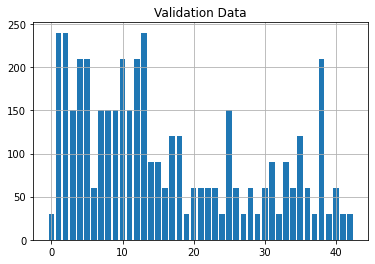

In [25]:
import seaborn as sns


def histogram(a,b):
    c, d = np.unique(a, return_counts=True)
    plt.bar(c, d)
    plt.grid()
    plt.title(b)
    plt.show()

histogram(y_train,"Train Data")
histogram(y_test,"Test Data" )
histogram(y_valid,"Validation Data")




----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [26]:
### Preprocess the data here. Preprocessing steps could include normalization, converting to grayscale, etc.
### Feel free to use as many code cells as needed.
import tensorflow as tf
from tensorflow.contrib.layers import flatten
from math import ceil
from sklearn.utils import shuffle



### Shuffle the training data.
### You do not need to modify this section.

In [27]:
from sklearn.utils import shuffle

x_train, y_train = shuffle(x_train, y_train)

In [28]:
import cv2
#from sklearn.utils import shuffle
import random

'''
def grayscale(x_train):
    # grayscale
    
    return cv2.cvtColor(x_train, cv2.COLOR_RGB2GRAY)
'''

def image_processing(a): #grayscale and normalizing at one time
    # grayscale
    gray = np.sum(a/3 ,axis=3, keepdims=True)
    normal_gray = (gray-128)/128
    return normal_gray




gray_x_train = image_processing(x_train)
gray_x_test = image_processing(x_test)
gray_x_valid = image_processing(x_valid)

print(x_train.shape)
print(gray_x_train.shape)
print(x_test.shape)
print(gray_x_test.shape)
print(x_valid.shape)
print(gray_x_valid.shape)


(34799, 32, 32, 3)
(34799, 32, 32, 1)
(12630, 32, 32, 3)
(12630, 32, 32, 1)
(4410, 32, 32, 3)
(4410, 32, 32, 1)


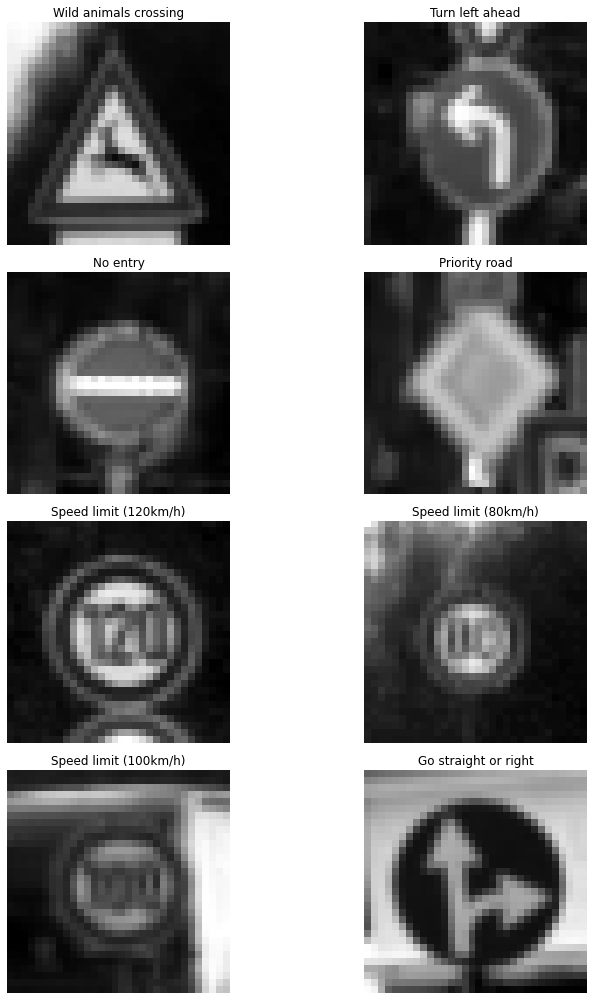

In [29]:

#x_train, y_train = shuffle(x_train, y_train)

sample_images = 8
gray_imgs = {} #{}과 []이 차이가 있음
random_imgs= []
gray_labels ={} #{}과 []이 차이가 있음. 바꿔보며 시도해볼것

'''
for i in range(sample_images):
    idx = random.randint(0, n_train-1)
    gray_labels[i] = name_values[y_train[idx]][1].decode('ascii')
    gray_imgs[i] = gray_x_train[idx].squeeze()
    random_imgs.append(idx)
'''

def grayimages(sample_images):
    for i in range(sample_images):
        idx = random.randint(0, n_train-1)
        gray_labels[i] = csv_values[y_train[idx]][1].decode('ascii')
        gray_imgs[i] = gray_x_train[idx].squeeze()
        random_imgs.append(idx)
    return gray_labels,gray_imgs

(gray_labels,gray_imgs) = grayimages(sample_images)
plot_images(gray_imgs,4,2,gray_labels)

In [30]:
#allocate the variables for the below codes (for easy coding)

X_train = gray_x_train
X_test = gray_x_test
X_valid = gray_x_valid

### Model Architecture

In [31]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [32]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

##Implement LeNet-5


Implement the LeNet-5 neural network architecture.

This is the only cell you need to edit.

Input
The LeNet architecture accepts a 32x32xC image as input, where C is the number of color channels. Since MNIST images are grayscale, C is 1 in this case.

Architecture
Layer 1: Convolutional. The output shape should be 28x28x6.

Activation. Your choice of activation function.

Pooling. The output shape should be 14x14x6.

Layer 2: Convolutional. The output shape should be 10x10x16.

Activation. Your choice of activation function.

Pooling. The output shape should be 5x5x16.

Flatten. Flatten the output shape of the final pooling layer such that it's 1D instead of 3D. The easiest way to do is by using tf.contrib.layers.flatten, which is already imported for you.

Layer 3: Fully Connected. This should have 120 outputs.

Activation. Your choice of activation function.

Layer 4: Fully Connected. This should have 84 outputs.

Activation. Your choice of activation function.

Layer 5: Fully Connected (Logits). This should have 10 outputs.

Output
Return the result of the 2nd fully connected layer.

In [33]:
import tensorflow as tf
from tensorflow.contrib.layers import flatten



## Features and Labels
Train LeNet to classify [MNIST](http://yann.lecun.com/exdb/mnist/) data.

`x` is a placeholder for a batch of input images.
`y` is a placeholder for a batch of output labels.

You do not need to modify this section.

##Training Pipeline

Create a training pipeline that uses the model to classify MNIST data.

You do not need to modify this section.

## Model Evaluation

Evaluate how well the loss and accuracy of the model for a given dataset.

You do not need to modify this section.




##  Lenet (with dropout code)

In [34]:
#Lesson 13 -31 Convolutional network in tensorflow code
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))

#Set dropout
keep_prob = tf.placeholder(tf.float32) 
keep_prob2 = tf.placeholder(tf.float32)
one_hot_y = tf.one_hot(y, 43) #43숫자를 함부로 바꿀경우 에러

#total 5 dropouts

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)
    # 1st dropout
    conv1 = tf.nn.dropout(conv1, keep_prob)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2, name='convolution2')
    #2nd dropout
    conv2 = tf.nn.dropout(conv2, keep_prob)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID', name='convolution3')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    #Third dropout   
    fc0 = tf.nn.dropout(fc0, keep_prob)
    
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)
    #fourth dropout
    fc1 = tf.nn.dropout(fc1, keep_prob)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)
    
    #Fifth dropout
    fc2 = tf.nn.dropout(fc2, keep_prob)


    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma, name='weights'))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits
print('finish with drop out code')

finish with drop out code


## Features and Labels

In [35]:
EPOCHS = 20
BATCH_SIZE = 100

rate = 0.001
stddev = 0.01

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Please use `layer.__call__` method instead.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [36]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()


#이거는 Lenet solution에 나온거 그대로 아닌가?
def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob:1.0, keep_prob2:1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

## Train the model

In [37]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    Lenet_dropout_valid_accuracy_figure = []

    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob:0.6, keep_prob2:0.7})
            
        Lenet_dropout_accuracy = evaluate(X_valid, y_valid)
        Lenet_dropout_valid_accuracy_figure.append(Lenet_dropout_accuracy)

        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(Lenet_dropout_accuracy))
        print()
        
    saver.save(sess, './Lenet_with_Dropout') #meta model path이며 파일명이다
    #saver.save(sess, './Lenet_with_Dropout', write_meta_graph=False)

    print("Lenet_with_Dropout_Model saved!!!")

Training...

EPOCH 1 ...
Validation Accuracy = 0.592

EPOCH 2 ...
Validation Accuracy = 0.720

EPOCH 3 ...
Validation Accuracy = 0.793

EPOCH 4 ...
Validation Accuracy = 0.827

EPOCH 5 ...
Validation Accuracy = 0.833

EPOCH 6 ...
Validation Accuracy = 0.851

EPOCH 7 ...
Validation Accuracy = 0.862

EPOCH 8 ...
Validation Accuracy = 0.860

EPOCH 9 ...
Validation Accuracy = 0.871

EPOCH 10 ...
Validation Accuracy = 0.870

EPOCH 11 ...
Validation Accuracy = 0.877

EPOCH 12 ...
Validation Accuracy = 0.883

EPOCH 13 ...
Validation Accuracy = 0.890

EPOCH 14 ...
Validation Accuracy = 0.898

EPOCH 15 ...
Validation Accuracy = 0.898

EPOCH 16 ...
Validation Accuracy = 0.904

EPOCH 17 ...
Validation Accuracy = 0.898

EPOCH 18 ...
Validation Accuracy = 0.891

EPOCH 19 ...
Validation Accuracy = 0.911

EPOCH 20 ...
Validation Accuracy = 0.898

Lenet_with_Dropout_Model saved!!!


### Applied total 5 dropout result is not better than 2 or 3 dropout.
### The best dropout is 2 or 3 for this analysis.
### after EPOCH 25, result is stay in 92~95%
### I guess that 25~30 EPOCH is enough.

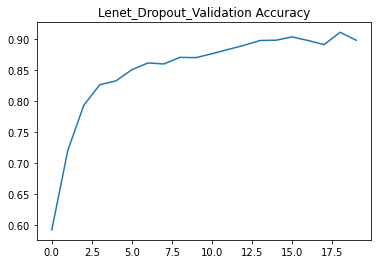

In [38]:
plt.plot(Lenet_dropout_valid_accuracy_figure)
plt.title("Lenet_Dropout_Validation Accuracy")
plt.show()

## Evaluate the Model
Once you are completely satisfied with your model, evaluate the performance of the model on the test set.

Be sure to only do this once!

If you were to measure the performance of your trained model on the test set, then improve your model, and then measure the performance of your model on the test set again, that would invalidate your test results. You wouldn't get a true measure of how well your model would perform against real data.

You do not need to modify this section.

In [39]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    train_accuracy = evaluate(X_train, y_train)
    print("Train Accuracy = {:.3f}".format(train_accuracy))
      
    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))
    
    valid_accuracy = evaluate(X_valid, y_valid)
    print("Valid Accuracy = {:.3f}".format(valid_accuracy)) 

INFO:tensorflow:Restoring parameters from .\Lenet_with_Dropout
Train Accuracy = 0.957
Test Accuracy = 0.903
Valid Accuracy = 0.898


## Please Help below this cell

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

### Apply to korea traffic sings

### Imports modules

In [45]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf
import cv2
from tensorflow import keras
#from tensorflow.keras import layers, Dense, Input, InputLayer, Flatten
from tensorflow.keras.models import Sequential, Model
from  matplotlib import pyplot as plt
import matplotlib.image as mpimg
import random

from PIL import Image
import glob
import os
from sklearn.metrics import accuracy_score
%matplotlib inline

In [46]:
print(os.getcwd()) #confirm the current path

C:\Python\traffic-signs-data


### Check the test images

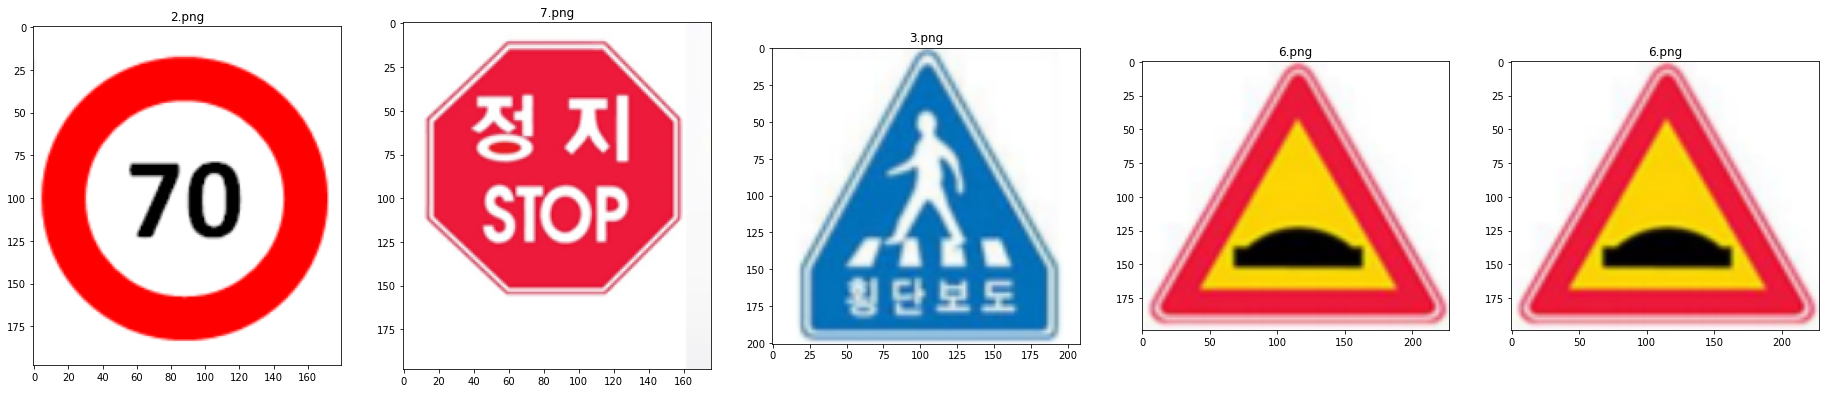

In [47]:
#check the sample images!
korea_img_folder=r'C:/Python/traffic-signs-data/png/test'
plt.figure(figsize=(32,32))
#test_folder=r'./png/korea/test'
#test_folder=r'C:/Python/traffic-signs-data/png/korea/test'

for i in range(5):
    file = random.choice(os.listdir(korea_img_folder))
    image_path= os.path.join(korea_img_folder, file)
    img=mpimg.imread(image_path)
    ax=plt.subplot(1,5,i+1)
    ax.title.set_text(file)
    plt.imshow(img)    

### Load the saved data

In [51]:
#알렉스트레이브의 코드응용 (preprocess)
def image_processing(a): #grayscale and normalizing at one time #기존에 쓰던 것
    # grayscale
    gray = np.sum(a/3 ,axis=3, keepdims=True)
    normal_gray = (gray-128)/128
    return normal_gray


#알렉스트레이브의 코드응용
# Resize the image to the size of the training data
def resize(image):
    image = image.resize((32,32))
    image=np.asarray(image)
    return image


#아레의 코드는 알렉스트레이브의 코드를 응용 한 것
# Read in the file in the test_images folder

#glob로 이미지를 읽어옴
korea_list=glob.glob("./png/test/*.png")

#이미지를 담을 빈리스트를 생성(이미지를 이진화 하는거 같네?)
korea_test=[]
Korea_labels = []


#알렉스트레이브의 코드를 응용
for img in korea_list:
    korea_test.append(resize(Image.open(img)))
korea_test=image_processing(np.array(korea_test))


    
    
    
with tf.Session() as sess:

    # 변수 초기화
    sess.run(tf.global_variables_initializer())

    # 저장된 모델 파라미터를 가져옵니다.
    model_path = './Lenet_with_Dropout' #.meta라고 확장자 써주면 에러발생
    saver = tf.train.Saver()

    saver.restore(sess, model_path)
    print("Model restored from file: %s" % model_path)

INFO:tensorflow:Restoring parameters from ./Lenet_with_Dropout
Model restored from file: ./Lenet_with_Dropout



## Prediction 

### Predict sign type for each image

In [49]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.